In [1]:
# Load library or package
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Employee_Salary.csv')

In [3]:
df.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [4]:
df.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.3 KB


In [6]:
df.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


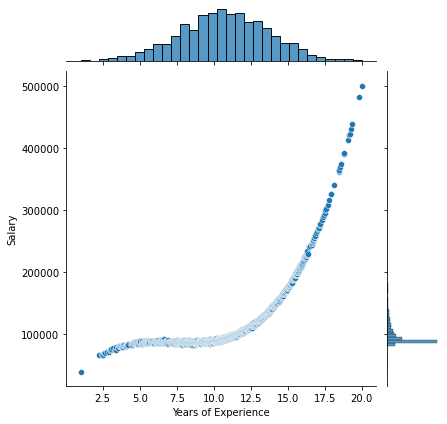

In [7]:
sns.jointplot(x = 'Years of Experience', y = 'Salary', data = df)

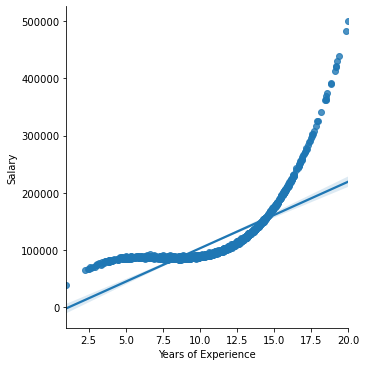

In [8]:
sns.lmplot(x = 'Years of Experience', y = 'Salary', data = df)

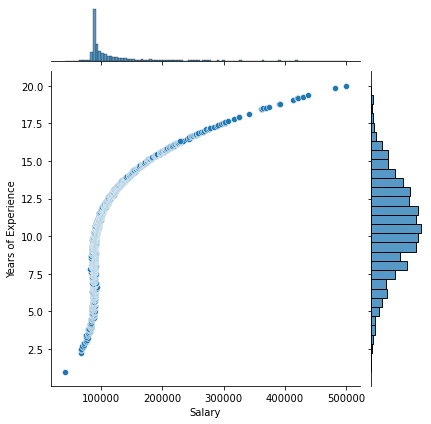

In [9]:
sns.jointplot(x = 'Salary', y = 'Years of Experience', data = df)

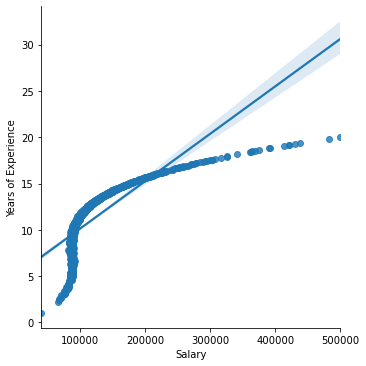

In [10]:
sns.lmplot(x = 'Salary', y = 'Years of Experience', data = df)

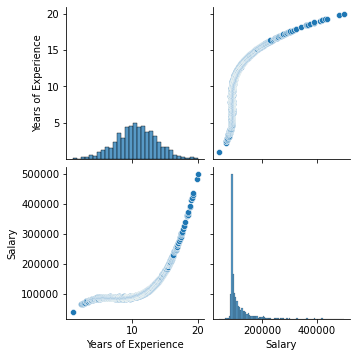

In [11]:
sns.pairplot(df)

In [12]:
df.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [16]:
X = df['Years of Experience']
X

0        1.000000
1        2.257942
2        2.450875
3        2.498713
4        2.613729
          ...    
1995    19.178575
1996    19.254499
1997    19.353369
1998    19.842520
1999    20.000000
Name: Years of Experience, Length: 2000, dtype: float64

In [17]:
type(X)

pandas.core.series.Series

In [19]:
X = df[['Years of Experience']]
X

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [20]:
X.shape

(2000, 1)

In [21]:
y = df['Salary']
y

0        40000.00000
1        65979.42119
2        67253.57549
3        67342.43510
4        70532.20448
            ...     
1995    421534.69100
1996    430478.02650
1997    438090.84540
1998    482242.16080
1999    500000.00000
Name: Salary, Length: 2000, dtype: float64

In [22]:
X.shape

(2000, 1)

In [23]:
y.shape

(2000,)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)

In [41]:
lr.fit(X,y)

LinearRegression()

In [42]:
print("Linear Model coeff (m): ",lr.coef_)
print("Linear Model coeff (c): ",lr.intercept_)

Linear Model coeff (m):  [11640.22916165]
Linear Model coeff (c):  -13063.09931518686


In [35]:
# Fit Intercept if True case
# Linear Model coeff (m):  11640.22916165
# Linear Model coeff (c):  -13063.09931518686

# Fit Intercept if False case
# Linear Model coeff (m):  10511.28514602
# Linear Model coeff (c):  0.0


Text(0.5, 1.0, 'Years of Experience vs Salary')

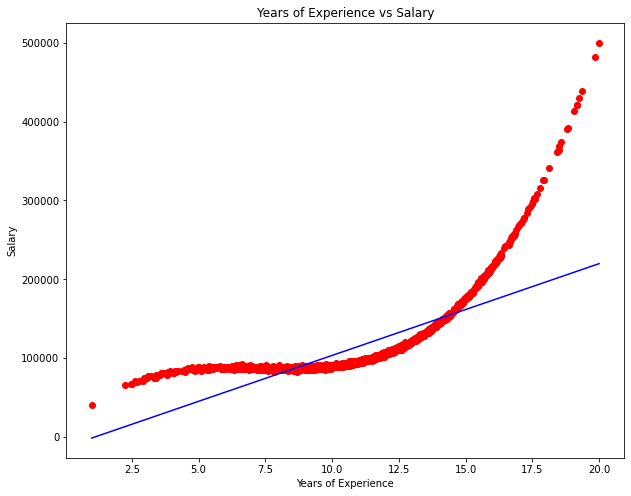

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(X,y, color='red')
plt.plot(X,lr.predict(X), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary, Linear')

In [65]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)

In [66]:
X_Columns = poly_reg.fit_transform(X)
X_Columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01,
        2.59926832e+01, 5.86899707e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01,
        3.60815324e+01, 8.84313424e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03,
        1.40289863e+05, 2.71508145e+06],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03,
        1.55019838e+05, 3.07598419e+06],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06]])

In [67]:
lr = LinearRegression()
lr.fit(X_Columns,y)

LinearRegression()

In [68]:
print("Model coefficient (m): ",lr.coef_)

Model coefficient (m):  [ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
 -1.03521070e+00  2.09284278e-02]


In [69]:
y_pred = lr.predict(poly_reg.fit_transform(X))
y_pred

array([ 39824.51537015,  64327.83548996,  67134.6284576 , ...,
       437663.70770904, 483003.64363658, 498394.32226614])

Text(0.5, 1.0, 'Years of Experience vs Salary, (Polynomial, Order=2)')

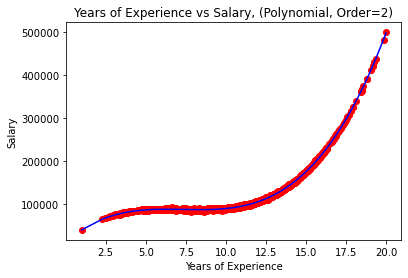

In [70]:
plt.scatter(X,y, color='red')
plt.plot(X,y_pred, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary, (Polynomial, Order=2)')